### Installing required packages
Restart the notebook after installation

In [1]:
!pip install sklearn-genetic-opt
!pip install pyswarm
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Loading Data
#### Indian Liver Patient Dataset 
Source UCI:
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In [2]:
# First connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Indian Liver Patient Dataset 
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Work/Manzoor/optimization/data/Indian Liver Patient Dataset (ILPD).csv', header=None)
data.columns = ['Age','Gender','c1','c2','c3','c4','c5','c6','c7','c8','Label']

### Data Exploration


In [4]:
# Size of data
data.shape

(583, 11)

In [5]:
# Sample of data
data.head()

,Age,Gender,c1,c2,c3,c4,c5,c6,c7,c8,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
"Minimum and Maximum Age range:", data.Age.min(), data.Age.max()

('Minimum and Maximum Age range:', 4, 90)

<Axes: title={'center': 'Female vs Male Ratio'}>

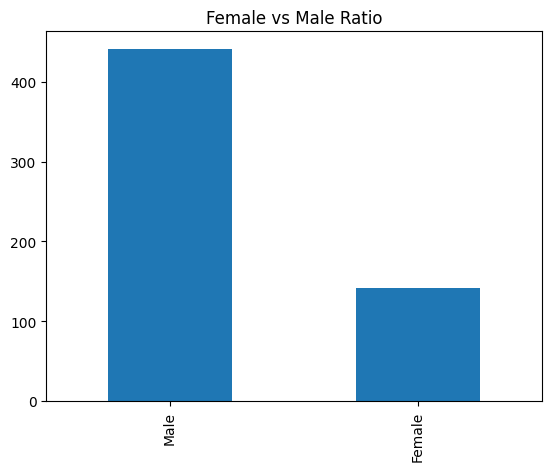

In [7]:
data.Gender.value_counts().plot(kind='bar',title='Female vs Male Ratio')

<Axes: title={'center': 'Male Liver Disease Ratio'}>

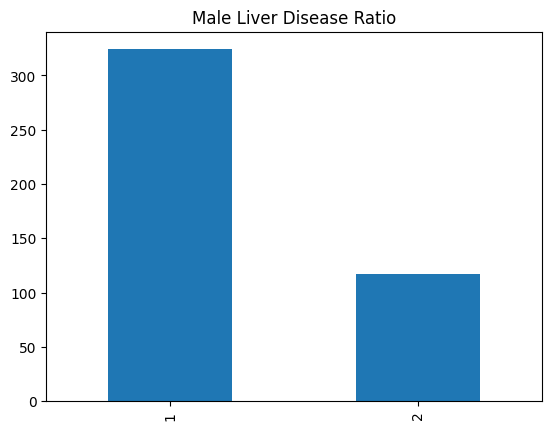

In [8]:
data[data.Gender=='Male'].Label.value_counts().plot(kind='bar',title='Male Liver Disease Ratio')

<Axes: title={'center': 'Female Liver Disease Ratio'}>

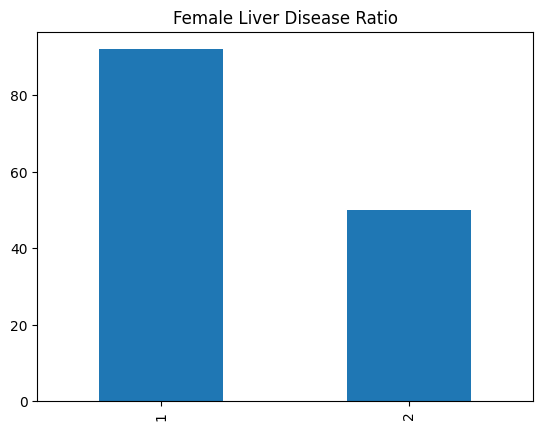

In [9]:
data[data.Gender=='Female'].Label.value_counts().plot(kind='bar',title='Female Liver Disease Ratio')

### Data Cleaning
In this section we remove null values from data.

#### Column wise null values

In [10]:
data.isna().sum()

Age       0
Gender    0
c1        0
c2        0
c3        0
c4        0
c5        0
c6        0
c7        0
c8        4
Label     0
dtype: int64

#### Removing Null Values 
We impute mean value in replacement of null values

In [11]:
data['c8'] = data['c8'].fillna(data['c8'].mean())

Now we can see there are no null values 

In [12]:
data.isna().sum()

Age       0
Gender    0
c1        0
c2        0
c3        0
c4        0
c5        0
c6        0
c7        0
c8        0
Label     0
dtype: int64

### Data Encoding 
Here we encode categorical attribues in data such as Gender and Label. We assign each category a unique id so that we can input the data to the model in required format.

In [13]:
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Label'] = data['Label'].astype('category').cat.codes
data.head()

,Age,Gender,c1,c2,c3,c4,c5,c6,c7,c8,Label
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


### Liver patients vs non-patients

In [14]:
pd.DataFrame(data['Label'].value_counts())

,Label
0,416
1,167


### Splitting data

In [21]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.3,stratify=data['Label'])

X_train = train_data.drop(columns=['Label'])
y_train = train_data.Label
X_test = test_data.drop(columns=['Label'])
y_test = test_data.Label

X_train.shape, X_test.shape

((408, 10), (175, 10))

### Training Genatic Algorithm

In [16]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

selectors = GeneticSelectionCV(estimators,
                              cv=6,
                              verbose=2,
                              scoring="accuracy",
                              max_features=6,
                              n_population=50,
                              crossover_proba=0.6,
                              mutation_proba=0.01,
                              n_generations=100,
                              crossover_independent_proba=0.6,
                              mutation_independent_proba=0.06,
                              tournament_size=4,
                              n_gen_no_change=20,
                              caching=True,
                              n_jobs=-2)
selectors = selectors.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = selectors.predict(X_test)
y_true = y_test
# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_true, y_pred)
print("F1 score:", f1)

# Compute AUROC
auroc = roc_auc_score(y_true, y_pred)
print("AUROC:", auroc)


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	50    	[ 0.713824  3.56      0.019443]	[ 0.007852  1.651181  0.01141 ]	[ 0.693627  1.        0.005481]	[ 0.732843  6.        0.049507]
1  	28    	[-399.306765    4.62      400.023291]	[ 1959.7333       1.440694  1959.58704 ]	[-10000.            1.            0.006932]	[     0.735294      8.        10000.      ]
2  	22    	[-399.300637    5.3       400.025581]	[ 1959.734551     0.921954  1959.586572]	[-10000.            3.            0.007353]	[     0.735294      7.        10000.      ]
3  	27    	[-799.328725    5.64      800.024655]	[ 2713.129941     0.842852  2712.924723]	[-10000.            4.            0.006932]	[     0.735294      8.        10000.      ]
4  	18    	[-999.341029    5.7      1000.021823]	[ 3000.219657     0.9       2999.992726]	[-10000.            3.            0.016981]	[     0.735

### Training Particle Swarm Optimization (PSO)

In [23]:
from pyswarm import pso

# Define the objective function for PSO optimization
def objective_function(params):
    c, tol = params
    clf = linear_model.LogisticRegression(C=c, tol=tol, solver='liblinear')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    return -score  # maximize accuracy

# Set the lower and upper bounds for the parameters
lb = [0.1, 1e-5]
ub = [100, 1e-2]

# Perform PSO optimization
xopt, fopt = pso(objective_function, lb, ub, swarmsize=10, maxiter=100)

# Print the optimized parameters and accuracy
print("Optimized parameters:", xopt)
print("Optimized accuracy:", -fopt)

# Define the logistic regression model with optimized parameters
c_opt, tol_opt = xopt
clf = linear_model.LogisticRegression(C=c_opt, tol=tol_opt, solver='liblinear')

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute the evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_prob)

# Print the evaluation scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUROC:", auroc)

Stopping search: maximum iterations reached --> 100
Optimized parameters: [0.1        0.00559804]
Optimized accuracy: 0.7428571428571429
Accuracy: 0.7428571428571429
Precision: 0.6666666666666666
Recall: 0.2
F1 score: 0.30769230769230765
AUROC: 0.76352


### Training Differential Evolution

In [18]:
from scipy.optimize import differential_evolution

# Define the objective function for Differential Evolution optimization
def objective_function(params):
    C = params[0]
    tol = params[1]
    max_iter = int(params[2])
    clf = linear_model.LogisticRegression(C=C, tol=tol, max_iter=max_iter)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)

# Define the parameter bounds for Differential Evolution
bounds = [(0.001, 100), (1e-6, 1), (10, 1000)]

# Perform Differential Evolution optimization
result = differential_evolution(objective_function, bounds, seed=0)

# Extract the best parameters and train a final logistic regression model
best_params = result.x
C = best_params[0]
tol = best_params[1]
max_iter = int(best_params[2])
clf = linear_model.LogisticRegression(C=C, tol=tol, max_iter=max_iter)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute the evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_prob)

# Print the evaluation scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUROC:", auroc)

Accuracy: 0.7485714285714286
Precision: 0.6363636363636364
Recall: 0.28
F1 score: 0.3888888888888889
AUROC: 0.7163200000000001


### Traning Simulated Annealing 

In [29]:
import numpy as np

# Define the objective function for Simulated Annealing optimization
def objective_function(params, X_train, y_train, X_test, y_test):
    C = params[0]
    tol = params[1]
    
    max_iter = int(params[2])
    if tol >= 0 and C >= 0 and max_iter >= 0: 
      clf = linear_model.LogisticRegression(C=C, tol=tol, max_iter=max_iter)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      return -accuracy_score(y_test, y_pred)

# Define the initial temperature and cooling rate
T0 = 10
alpha = 0.95

# Define the initial solution
x0 = np.array([1, 1e-4, 100])

# Define the step sizes for each parameter
step_sizes = np.array([0.1, 1e-5, 10])

# Define the number of iterations and maximum number of rejections
n_iter = 1000
max_reject = 50


# Initialize the current solution and objective function value
x_current = x0
f_current = objective_function(x_current, X_train, y_train, X_test, y_test)

# Initialize the best solution and objective function value
x_best = x_current
f_best = f_current

# Iterate until the maximum number of iterations is reached
for i in range(n_iter):
    # Generate a new candidate solution
    x_candidate = x_current + step_sizes * np.random.randn(len(x_current))
    
    # Calculate the objective function value for the candidate solution
    f_candidate = objective_function(x_candidate, X_train, y_train, X_test, y_test)
    
    # Calculate the acceptance probability
    delta_f = f_candidate - f_current
    T = T0 * alpha ** i
    p_accept = np.exp(-delta_f / T)
    
    # Decide whether to accept or reject the candidate solution
    if np.random.rand() < p_accept:
        x_current = x_candidate
        f_current = f_candidate
        
        # Update the best solution if necessary
        if f_current < f_best:
            x_best = x_current
            f_best = f_current
    else:
        # Reject the candidate solution and increment the rejection counter
        max_reject -= 1
        
        # Terminate the algorithm if the maximum number of rejections is reached
        if max_reject == 0:
            break

# Extract the best parameters and train a final logistic regression model
best_params = x_best
C = best_params[0]
tol = best_params[1]
max_iter = int(best_params[2])
clf = linear_model.LogisticRegression(C=C, tol=tol, max_iter=max_iter)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute the evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_prob)

# Print the evaluation scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUROC:", auroc)

Accuracy: 0.7371428571428571
Precision: 0.625
Recall: 0.2
F1 score: 0.30303030303030304
AUROC: 0.77232
